In [33]:
import pandas as pd
import numpy as np

In [34]:
news_data = pd.read_csv('data/TSLA-2024-01-01-2024-05-01.csv')
news_data.head()

,id,datetime,impact,headline,summary
0,127369830,2024-05-02 06:07:03,0,Tracking Baillie Gifford's 13F Portfolio - Q1 ...,Baillie Gifford's 13F portfolio increases to $...
1,127364259,2024-05-02 05:38:00,0.5,Looking for an Alternative to Tesla Stock? Li ...,This company in an exciting industry is worth ...
2,127381078,2024-05-02 05:33:42,-0.5,Tesla Interns Say Offers Are Getting Revoked W...,(Bloomberg) -- Elon Musk’s latest cost-cutting...
3,127366208,2024-05-02 04:29:00,0,Tesla Just Got More Good News From China. Shar...,Shares of the electric-vehicle maker rose abou...
4,127366211,2024-05-02 03:55:39,-0.8,Musk tweets plans to slow Tesla supercharger g...,Tesla (TSLA) CEO Elon Musk took to Twitter to ...


# Add Sentiment Score to news

In [35]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [36]:
news_analyzer = SentimentIntensityAnalyzer()

In [37]:
def computerSentimentScore(text: str) -> float:
    vs = news_analyzer.polarity_scores(text)
    return vs['compound']

In [38]:
computerSentimentScore(news_data['summary'][0])

0.3612

In [39]:
news_data['sentscore'] = news_data['summary'].apply(lambda x:computerSentimentScore(str(x)))

In [40]:
news_data.head()

,id,datetime,impact,headline,summary,sentscore
0,127369830,2024-05-02 06:07:03,0,Tracking Baillie Gifford's 13F Portfolio - Q1 ...,Baillie Gifford's 13F portfolio increases to $...,0.3612
1,127364259,2024-05-02 05:38:00,0.5,Looking for an Alternative to Tesla Stock? Li ...,This company in an exciting industry is worth ...,0.6249
2,127381078,2024-05-02 05:33:42,-0.5,Tesla Interns Say Offers Are Getting Revoked W...,(Bloomberg) -- Elon Musk’s latest cost-cutting...,-0.8885
3,127366208,2024-05-02 04:29:00,0,Tesla Just Got More Good News From China. Shar...,Shares of the electric-vehicle maker rose abou...,-0.2023
4,127366211,2024-05-02 03:55:39,-0.8,Musk tweets plans to slow Tesla supercharger g...,Tesla (TSLA) CEO Elon Musk took to Twitter to ...,0.2732


In [41]:
news_data = news_data.set_index('datetime')

In [42]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6147 entries, 2024-05-02 06:07:03 to 2024-01-01 10:04:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         6147 non-null   int64  
 1   impact     5702 non-null   object 
 2   headline   6147 non-null   object 
 3   summary    6100 non-null   object 
 4   sentscore  6147 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 288.1+ KB


In [43]:
news_data.shape

(6147, 5)

In [44]:
news_score_data = (news_data.dropna())[['sentscore']]

In [45]:
news_score_data.info

<bound method DataFrame.info of                      sentscore
datetime                      
2024-05-02 06:07:03     0.3612
2024-05-02 05:38:00     0.6249
2024-05-02 05:33:42    -0.8885
2024-05-02 04:29:00    -0.2023
2024-05-02 03:55:39     0.2732
...                        ...
2024-01-01 15:59:00     0.0000
2024-01-01 15:00:00     0.0516
2024-01-01 14:20:00     0.0000
2024-01-01 14:14:00     0.0000
2024-01-01 13:06:00    -0.2732

[5666 rows x 1 columns]>

In [46]:
news_score_data.shape

(5666, 1)

In [47]:
from darts import TimeSeries

In [48]:
news_score_data.index = pd.to_datetime(news_score_data.index).tz_localize(None)
news_score_data_avg = news_score_data.resample('30min').mean()

In [49]:
news_score_data_avg.shape

(5843, 1)

In [50]:
news_score_data_avg = news_score_data_avg.dropna()
news_score_data_avg.shape

(2899, 1)

In [51]:
news_score_data_avg.info

<bound method DataFrame.info of                      sentscore
datetime                      
2024-01-01 13:00:00   -0.27320
2024-01-01 14:00:00    0.00000
2024-01-01 15:00:00    0.05160
2024-01-01 15:30:00    0.00000
2024-01-01 16:00:00    0.39820
...                        ...
2024-05-02 01:30:00    0.46155
2024-05-02 03:30:00    0.27320
2024-05-02 04:00:00   -0.20230
2024-05-02 05:30:00   -0.13180
2024-05-02 06:00:00    0.36120

[2899 rows x 1 columns]>

In [52]:
news_score_data_ts = TimeSeries.from_dataframe(news_score_data_avg,
                                               fill_missing_dates=False,
                                               fillna_value=0,
                                               freq='30min')

<Axes: xlabel='datetime'>

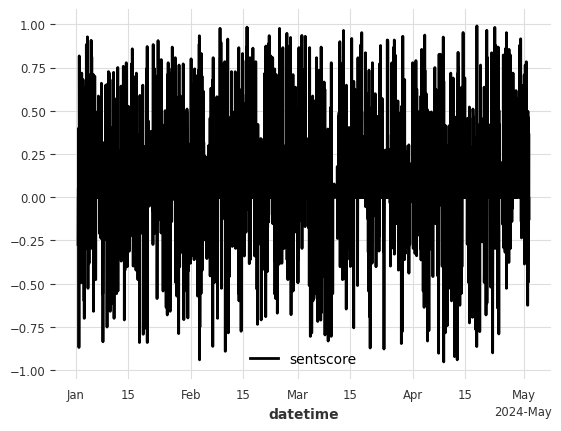

In [53]:
news_score_data_ts.plot()

In [54]:
news_score_data_ts.to_csv('data/prepared/news_score_data.csv')

# Gather the stock data with minute

In [55]:
import yfinance as yf

https://github.com/ranaroussi/yfinance/wiki/Ticker#history

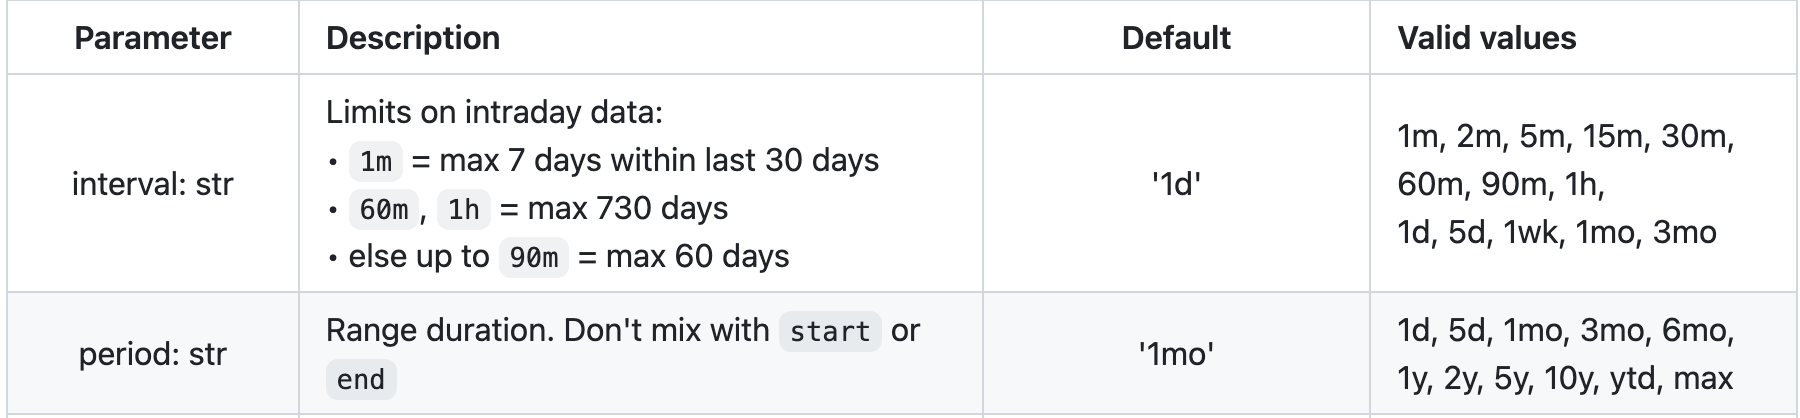

In [62]:
tsla_data = yf.download("TSLA", interval="30m", period = "60d", auto_adjust=True)

/Users/mac/miniconda3/envs/DartsStockDemo/lib/python3.11/site-packages/yfinance/scrapers/history.py:231: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  quotes2 = quotes.resample('30T')
[*********************100%%**********************]  1 of 1 completed


In [63]:
tsla_data.shape

(780, 5)

In [64]:
tsla_data.info

<bound method DataFrame.info of                            Open        High         Low       Close    Volume
Datetime                                                                     
2024-02-15 09:30:00  189.589996  193.610001  188.859497  192.869995  17286354
2024-02-15 10:00:00  192.889999  195.759995  192.680099  195.179993  13604143
2024-02-15 10:30:00  195.143707  195.449997  193.009995  193.052902  10069468
2024-02-15 11:00:00  193.059998  193.850006  192.369995  193.647095   6988261
2024-02-15 11:30:00  193.639999  194.759995  193.529999  194.690002   5185640
...                         ...         ...         ...         ...       ...
2024-05-10 13:30:00  168.636002  169.049896  168.220001  168.645004   2719948
2024-05-10 14:00:00  168.639999  168.639999  167.776505  168.550003   3199578
2024-05-10 14:30:00  168.553802  168.868393  168.330002  168.830002   1956397
2024-05-10 15:00:00  168.835007  169.199997  168.431305  169.154007   3006065
2024-05-10 15:30:00  169.160004 

In [65]:
#comparison_date = pd.Timestamp('2023-12-31',tz="America/New_York")

In [66]:
#comparison_date

In [68]:
#tsla_data_2024 = tsla_data[tsla_data.index > comparison_date]

In [67]:
tsla_data_2024 = tsla_data

In [69]:
tsla_data_2024.shape

(780, 5)

In [70]:
tsla_data_2024_ts = TimeSeries.from_dataframe(tsla_data_2024,
                                               fill_missing_dates=True,
                                               freq='30min')

<Axes: xlabel='Datetime'>

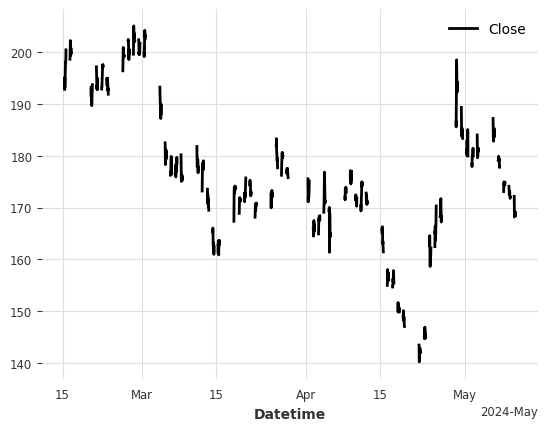

In [71]:
tsla_data_2024_ts['Close'].plot()

In [72]:
from darts.utils.missing_values import fill_missing_values

<Axes: xlabel='Datetime'>

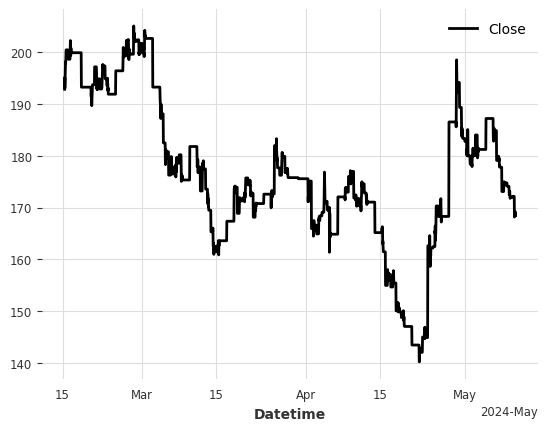

In [73]:
tsla_data_2024_ts_fm = fill_missing_values(tsla_data_2024_ts,fill='auto',method='nearest')
tsla_data_2024_ts_fm['Close'].plot()

In [74]:
tsla_data_2024_ts_fm.to_csv('data/prepared/tsla_stock_data.csv')

# Merge the data

In [75]:
news_score_data_df = news_score_data_ts.pd_dataframe()

In [76]:
news_score_data_df.shape

(5843, 1)

In [77]:
tsla_data_2024_ts_df = tsla_data_2024_ts_fm.pd_dataframe()

In [78]:
tsla_data_2024_ts_df.shape

(4093, 5)

In [79]:
tsla_data_2024_ts_df = tsla_data_2024_ts_df.tz_localize(None)

In [80]:
merged_df = pd.merge(tsla_data_2024_ts_df, news_score_data_df, left_index=True, right_index=True, how='left')

In [81]:
merged_df.shape

(4093, 6)

In [82]:
merged_df = merged_df.dropna()

In [83]:
merged_df.shape

(3690, 6)

In [84]:
merged_df.columns = merged_df.columns.str.lower()

In [85]:
merged_df_ts = TimeSeries.from_dataframe(merged_df,fill_missing_dates=True,freq='30min')

<Axes: xlabel='Datetime'>

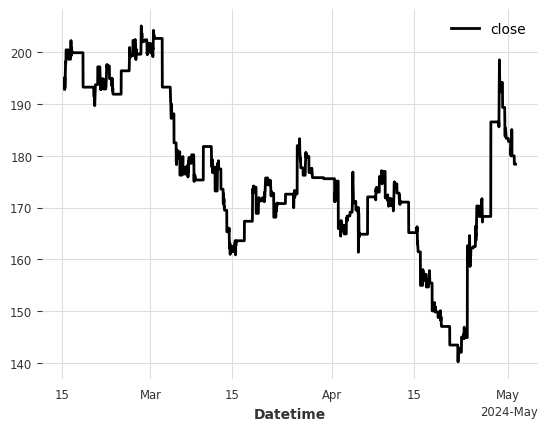

In [86]:
merged_df_ts['close'].plot()

<Axes: xlabel='Datetime'>

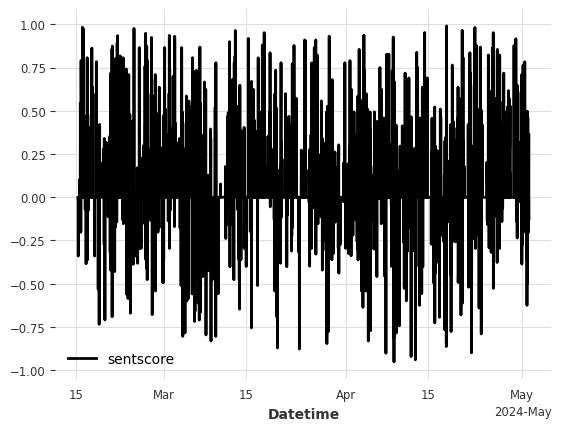

In [87]:
merged_df_ts['sentscore'].plot()

In [88]:
merged_df_ts.to_csv('data/prepared/tsla_data.csv')